In [7]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt

In [90]:
# 1. Загрузитевыборку Boston с помощью функции sklearn.datasets.load_boston().
#  Результатом вызова данной функции является объект, 
# у которого признаки записаны в поле data, а целевой вектор — в поле target.

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

In [102]:

# 2. Приведите признаки в выборке к одному масштабу при помощи функции sklearn.preprocessing.scale.

from sklearn.preprocessing import scale

# 3. Переберите разные варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию numpy.linspace). 
# Используйте KNeighborsRegressor с n_neighbors=5 и weights=’distance’ — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. 
# В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring=’mean_squared_error’ у cross_val_score; 
# при использовании библиотеки scikit-learn версии 18.0.1 и выше необходимо указывать scoring=’neg_mean_squared_error’).
#  Качество оценивайте, как и в предыдущем задании, с помощью кроссвалидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle=True, random_state=42)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

paraM = np.linspace(1, 10, 200)

Acc = np.zeros(200)
k = 0

for p in paraM:
    neigh_reg = KNeighborsRegressor(n_neighbors=5, weights = 'distance', p = p)
    # kf.split(scale(scale(data['data'])), data['target'])
    acc = cross_val_score(neigh_reg, scale(data['data'][1000:1500]), data['target'][1000:1500], cv = kf, scoring='neg_mean_squared_error')
    Acc[k] = acc.mean()
    k+=1


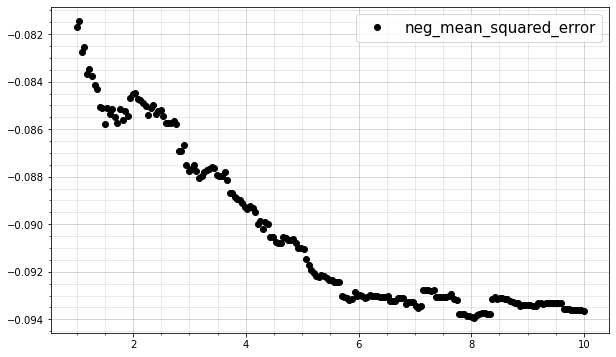

In [103]:
fig = plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(paraM, Acc, 'k', marker = 'o', linewidth = 0, label = 'neg_mean_squared_error')
plt.minorticks_on() 
plt.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2) 
plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.1)
plt.legend(fontsize = 15)